<a href="https://colab.research.google.com/github/nik-744/ML/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sujithmandala_credit_score_classification_dataset_path = kagglehub.dataset_download('sujithmandala/credit-score-classification-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv


In [ ]:
df = pd.read_csv("/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv")

In [ ]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [ ]:
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

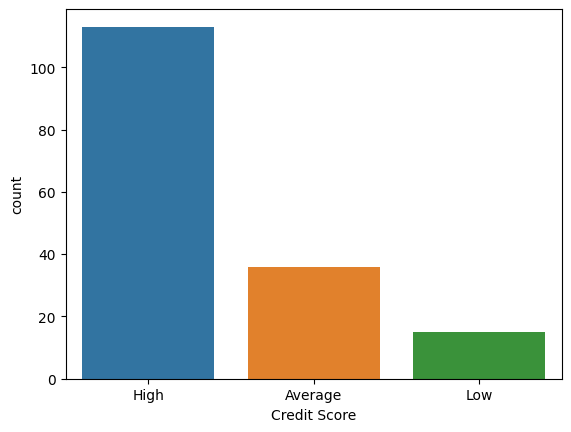

In [ ]:
sns.countplot(df,x="Credit Score")
plt.show()

# Dataset Imbalanced need to balance it


In [ ]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [ ]:
# Lable Encoding the Categorial values
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in df.columns:
    if df[i].dtype =="object":
        df[i]=le.fit_transform(df[i])

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Standard Scaling the values
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [ ]:
# Using SMOTE from balancing the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto",random_state=42)
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)

In [ ]:
# Import the model and fiting it to the dataset
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(random_state=42)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

In [ ]:
clf.score(xtest,ytest)

1.0

In [ ]:
ypred=clf.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(ytest,ypred)
print(f"Models Accuracy {acc}")

Models Accuracy 1.0


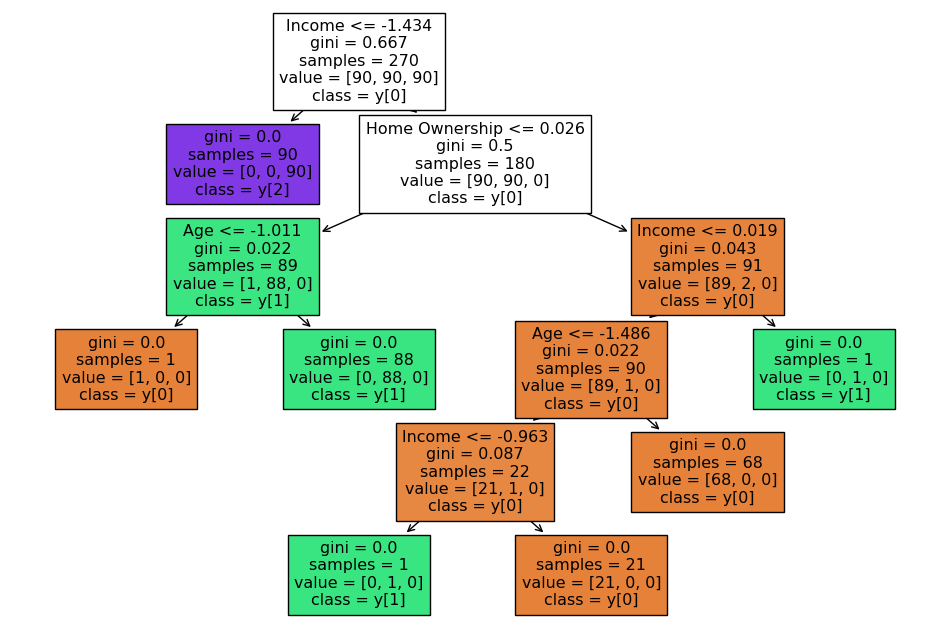

In [ ]:
# Ploting the model
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=df.iloc[:,:-1].columns, class_names=True)
plt.show()